<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.


### GRUPO 13:
#### Mariano Martín Gualpa ( mgualpa@gmail.com )
#### Laercio Simoes ( laercio@hpcbrasil.com )

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{0.01}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

## RESOLUCIÓN
<TABLE width="100%">
<TR><TD bgcolor="#2222EE">
</TD></TR>
</TABLE>
* Nota: consideramos que la función f.d.p. ($ f(x) = 0.01 e^{0.01} x$)a la que se hace referencia en el ejercicio debe contener un error tipográfico y en realidad se hacía referencia a la función de densidad de probabilidad exponencial. Este supuesto se considera pues el fenómeno descripto es usualmente asociado a esta distribución y porque la función descripta corresponde a una función lineal con coeficiente positivo ($0.01 e^{0.01}$), por lo que su área sumaría mas de 1. 


Partiendo de la función de densidad de probabilidad de la distribución exponencial f(x): 

$$ f(x) = 0.01 e^{-0.01 x}$$

La función de probabilidad acumulada F(x) se obtiene a partir de integrar la función de densidad de probabilidad:

$$ F(x) = \int_0^x \mathrm 0.01 e^{-0.01 x} \mathrm{d}x $$

$$ F(x) =  \bigg[ -e^{-0.01 x} \bigg]_0^x $$

$$ F(x) =  \big[ -e^{-0.01 x} - ( -e^{-0.01 * 0}) \big] $$

$$ F(x) =  \big[ -e^{-0.01 x} + 1 \big] $$

$$ F(x) =  \big[ 1 - e^{-0.01 x} \big] $$



In [42]:
import math

def fdpExponencial(lambdaParam, x):
    return (1-math.e**(-lambdaParam * x))

probabilidadEntre50y150 = fdpExponencial(0.01, 150) - fdpExponencial(0.01, 50)
probabilidadHasta100 = fdpExponencial(0.01, 100)

print("La probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse es:", probabilidadEntre50y150)
print("La probabilidad que una computadora se descomponga antes de registrar 100 horas de uso es:", probabilidadHasta100)

La probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse es: 0.3834004995642035
La probabilidad que una computadora se descomponga antes de registrar 100 horas de uso es: 0.6321205588285577


## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [43]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-20,30)

In [44]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.036573
std        4.998802
min      -18.097135
25%       -3.416583
50%       -0.044772
75%        3.365279
max       19.017097


/Volumes/HDDatos1/anaconda/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


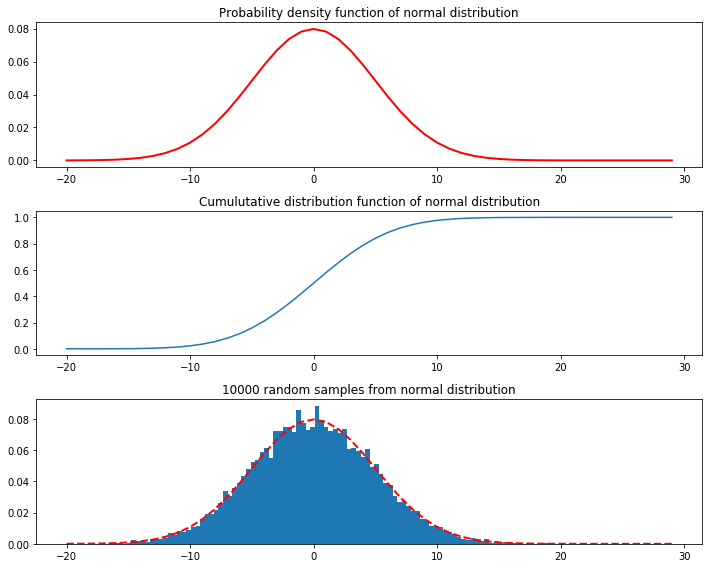

In [45]:
graphic_normal(mu, sigma, rng)

## RESOLUCIÓN
<TABLE width="100%">
<TR><TD bgcolor="#2222EE">
</TD></TR>
</TABLE>

Se analizan a continuación las variaciones sobre los parámetros mu, sigma y rango. Se ha modificado ligeramente la función de grafico para apilar distintas funciones. Primero se presentan los cambios sobre el parámetro mu +- deltaMu (manteniendo el mismo sigma) y posteriormente los cambios sobre sigma +- deltaSigma (manteniendo el mismo mu).


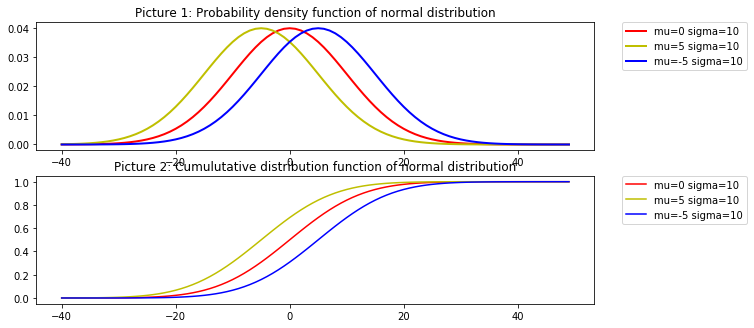

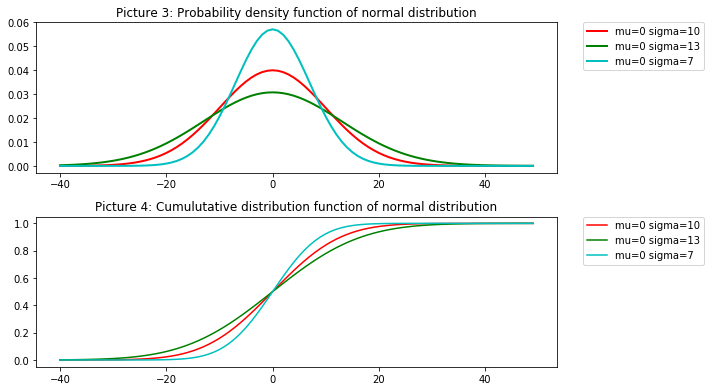

In [46]:
def graphic_normal_modificado(mu, deltaMu, sigma, deltaSigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)
    dist_left = norm(mu - deltaMu, sigma)
    dist_right = norm(mu + deltaMu, sigma)
    dist_wide = norm(mu, sigma + deltaSigma)
    dist_narrow = norm(mu, sigma - deltaSigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2, label="mu={} sigma={}".format(mu, sigma))
    plt.plot(rng, dist_left.pdf(rng), 'y', linewidth=2, label="mu={} sigma={}".format(mu + deltaMu, sigma))
    plt.plot(rng, dist_right.pdf(rng), 'b', linewidth=2, label="mu={} sigma={}".format(mu - deltaMu, sigma))
    plt.title('Picture 1: Probability density function of normal distribution')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng), 'r', label="mu={} sigma={}".format(mu, sigma))
    plt.plot(rng, dist_left.cdf(rng), 'y', label="mu={} sigma={}".format(mu + deltaMu, sigma))
    plt.plot(rng, dist_right.cdf(rng), 'b', label="mu={} sigma={}".format(mu - deltaMu, sigma))
    plt.title('Picture 2: Cumulutative distribution function of normal distribution')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    
    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2, label="mu={} sigma={}".format(mu, sigma))
    plt.plot(rng, dist_wide.pdf(rng), 'g', linewidth=2, label="mu={} sigma={}".format(mu, sigma + deltaSigma))
    plt.plot(rng, dist_narrow.pdf(rng), 'c', linewidth=2, label="mu={} sigma={}".format(mu, sigma - deltaSigma))
    plt.title('Picture 3: Probability density function of normal distribution')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng), 'r', label="mu={} sigma={}".format(mu, sigma))
    plt.plot(rng, dist_wide.cdf(rng), 'g', label="mu={} sigma={}".format(mu, sigma + deltaSigma))
    plt.plot(rng, dist_narrow.cdf(rng), 'c', label="mu={} sigma={}".format(mu, sigma - deltaSigma))
    plt.title('Picture 4: Cumulutative distribution function of normal distribution')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    plt.tight_layout()  # Make space for titles 
# Define parameters for normal distribution.
mu = 0
deltaMu = 10
sigma = 5
deltaSigma = 3
rng = range(-40,50)

graphic_normal_modificado(mu, sigma, deltaMu, deltaSigma, rng)

En los primeros dos gráficos (figuras 1 y 2) se presenta el impacto del cambio sobre el parámetro mu (manteniendo el mismo sigma): puede observarse que cambia la posición pero no la forma (que se relaciona con la dispersión).
En el segundo caso (figuras 3 y 4) se presenta el impacto del cambio sobre sigma (se mantiene el mismo mu): puede observarse que se mantiene la posición, pero cambia la forma (dispersión). En el caso de la función acumulada, a medida que disminuye la dispersión (sigma), se observa que aumenta la pendiente, lo cual se explica porque tarda mas en acumular al principio, pero pasada la media acumula mas rápido que las demás.
En todos los casos se ha ampliado el rango, lo que ha aumentado los límites inferior y superior en todos los casos. Debe considerarse que la distribución normal es asintótica. 

